## Data Visualization and storytelling
### Using data from a car listing website in Kenya.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the car listing data

car_list_df = pd.read_csv('Car_Listings254.csv')

In [3]:
# view the first 5 records

car_list_df.head()

,Name,Transmission,Engine Rating,Usage,Year of Manufacture,Price
0,Mitsubishi Canter,Automatic,3000 CC,Kenyan Used,2013,"KES 1,149,999"
1,Mitsubishi RVR,Automatic,1800 CC,Kenyan Used,2011,"KES 1,399,999"
2,BMW 320i,Automatic,2000 CC,Kenyan Used,2008,"KES 799,999"
3,Subaru Forester,Automatic,2000 CC,Kenyan Used,2016,"KES 2,699,999"
4,Suzuki Baleno,Automatic,1400 CC,Kenyan Used,2019,"KES 1,449,999"


In [4]:
# view shape of the dataframe

car_list_df.shape

(1250, 6)

In [5]:
# view info of the dataframe

car_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 1250 non-null   object
 1   Transmission         1250 non-null   object
 2   Engine Rating        1249 non-null   object
 3   Usage                1250 non-null   object
 4   Year of Manufacture  1250 non-null   int64 
 5   Price                1250 non-null   object
dtypes: int64(1), object(5)
memory usage: 58.7+ KB


In [6]:
# missing values count

car_list_df.isnull().sum()

,0
Name,0
Transmission,0
Engine Rating,1
Usage,0
Year of Manufacture,0
Price,0


In [7]:
# handling missing values

car_list_df.dropna(inplace=True)

In [8]:
# missing values count

car_list_df.isnull().sum()

,0
Name,0
Transmission,0
Engine Rating,0
Usage,0
Year of Manufacture,0
Price,0


In [9]:
# view shape of the dataframe

car_list_df.shape

(1249, 6)

In [10]:
"""
We want to create various visualisations from the car list data by car make, car model, engine rating and much more.
The car name is ideally a combination of car make and car model.
In order to plot separate visualisations using either car make or car model, we need to split the name column
and create 2 new columns namely: Car Make and Car Model.

"""

'\nWe want to create various visualisations from the car list data by car make, car model, engine rating and much more.\nThe car name is ideally a combination of car make and car model.\nIn order to plot separate visualisations using either car make or car model, we need to split the name column\nand create 2 new columns namely: Car Make and Car Model.\n\n'

##### Looking at the name column, we realise that there are records that contain two separate words as the car make. These are Mercedes Benz and Range Rover.

Firstly, we need to replace the two separate names with one name for any record that contains these car makes. Otherwise the names will be incorrectly split into the car make and car model in subsequent steps.

In [11]:
# replace Mercedes Benz with MercedesBenz

car_list_df['Name'] = car_list_df['Name'].str.replace('Mercedes Benz', 'MercedesBenz')

In [12]:
# replace Mercedes-Benz with MercedesBenz

car_list_df['Name'] = car_list_df['Name'].str.replace('Mercedes-Benz', 'MercedesBenz')

In [13]:
# replace Range Rover with RangeRover

car_list_df['Name'] = car_list_df['Name'].str.replace('Range Rover', 'RangeRover')

In [14]:
# Create a new column with car make

car_list_df['Car Make'] = car_list_df['Name'].str.split().str[0]
car_list_df.head()

,Name,Transmission,Engine Rating,Usage,Year of Manufacture,Price,Car Make
0,Mitsubishi Canter,Automatic,3000 CC,Kenyan Used,2013,"KES 1,149,999",Mitsubishi
1,Mitsubishi RVR,Automatic,1800 CC,Kenyan Used,2011,"KES 1,399,999",Mitsubishi
2,BMW 320i,Automatic,2000 CC,Kenyan Used,2008,"KES 799,999",BMW
3,Subaru Forester,Automatic,2000 CC,Kenyan Used,2016,"KES 2,699,999",Subaru
4,Suzuki Baleno,Automatic,1400 CC,Kenyan Used,2019,"KES 1,449,999",Suzuki


In [15]:
# create a new column with car model

car_list_df['Car Model'] = car_list_df['Name'].str.split().str[1]
car_list_df.head()

,Name,Transmission,Engine Rating,Usage,Year of Manufacture,Price,Car Make,Car Model
0,Mitsubishi Canter,Automatic,3000 CC,Kenyan Used,2013,"KES 1,149,999",Mitsubishi,Canter
1,Mitsubishi RVR,Automatic,1800 CC,Kenyan Used,2011,"KES 1,399,999",Mitsubishi,RVR
2,BMW 320i,Automatic,2000 CC,Kenyan Used,2008,"KES 799,999",BMW,320i
3,Subaru Forester,Automatic,2000 CC,Kenyan Used,2016,"KES 2,699,999",Subaru,Forester
4,Suzuki Baleno,Automatic,1400 CC,Kenyan Used,2019,"KES 1,449,999",Suzuki,Baleno


In [16]:
# total number of car makes

car_list_df['Car Make'].nunique()

36

In [17]:
# total number of cars in each make

car_list_df['Car Make'].value_counts()

,count
Car Make,
Toyota,281
Mazda,124
Nissan,117
MercedesBenz,114
Subaru,100
Volkswagen,73
Audi,69
BMW,63
Honda,47


In [18]:
"""
We have misplaced car makes due to errors during data entry.
These are Mercedes, Land, NissaNote and Mistubishi.
Let us replace these with the correct car makes.
"""

'\nWe have misplaced car makes due to errors during data entry.\nThese are Mercedes, Land, NissaNote and Mistubishi.\nLet us replace these with the correct car makes.\n'

In [19]:
# replace Mercedes with MercedesBenz

car_list_df["Car Make"] = car_list_df["Car Make"].replace("Mercedes", "MercedesBenz")

# replace Land with Landrover

car_list_df["Car Make"] = car_list_df["Car Make"].replace("Land", "Landrover")

# replace NissanNote with Nissan

car_list_df["Car Make"] = car_list_df["Car Make"].replace("NissanNote", "Nissan")

# replace Mistubishi with Mitsubishi

car_list_df["Car Make"] = car_list_df["Car Make"].replace("Mistubishi", "Mitsubishi")

In [20]:
# total number of cars in each make

car_list_df['Car Make'].value_counts()

,count
Car Make,
Toyota,281
Mazda,124
Nissan,118
MercedesBenz,118
Subaru,100
Volkswagen,73
Audi,69
BMW,63
Honda,47


In [21]:
"""
We also have a Car Make '2024' on the list.
We know that this is an invalid car make.
We need to drop this record.
"""

"\nWe also have a Car Make '2024' on the list. \nWe know that this is an invalid car make.\nWe need to drop this record.\n"

In [22]:
# drop row with 2024

car_list_df.drop(car_list_df.index[car_list_df['Car Make'] == '2024'], inplace=True)

In [23]:
# total number of cars in each make

car_list_df['Car Make'].value_counts()

,count
Car Make,
Toyota,281
Mazda,124
Nissan,118
MercedesBenz,118
Subaru,100
Volkswagen,73
Audi,69
BMW,63
Honda,47


In [24]:
# drop the name column

car_list_df.drop('Name', axis=1, inplace=True)

In [25]:
car_list_df.head()

,Transmission,Engine Rating,Usage,Year of Manufacture,Price,Car Make,Car Model
0,Automatic,3000 CC,Kenyan Used,2013,"KES 1,149,999",Mitsubishi,Canter
1,Automatic,1800 CC,Kenyan Used,2011,"KES 1,399,999",Mitsubishi,RVR
2,Automatic,2000 CC,Kenyan Used,2008,"KES 799,999",BMW,320i
3,Automatic,2000 CC,Kenyan Used,2016,"KES 2,699,999",Subaru,Forester
4,Automatic,1400 CC,Kenyan Used,2019,"KES 1,449,999",Suzuki,Baleno


In [26]:
# reorder the columns

car_list_df = car_list_df.loc[:, ['Car Make', 'Car Model', 'Transmission', 'Engine Rating', 'Year of Manufacture', 'Price']]

In [27]:
car_list_df.head()

,Car Make,Car Model,Transmission,Engine Rating,Year of Manufacture,Price
0,Mitsubishi,Canter,Automatic,3000 CC,2013,"KES 1,149,999"
1,Mitsubishi,RVR,Automatic,1800 CC,2011,"KES 1,399,999"
2,BMW,320i,Automatic,2000 CC,2008,"KES 799,999"
3,Subaru,Forester,Automatic,2000 CC,2016,"KES 2,699,999"
4,Suzuki,Baleno,Automatic,1400 CC,2019,"KES 1,449,999"


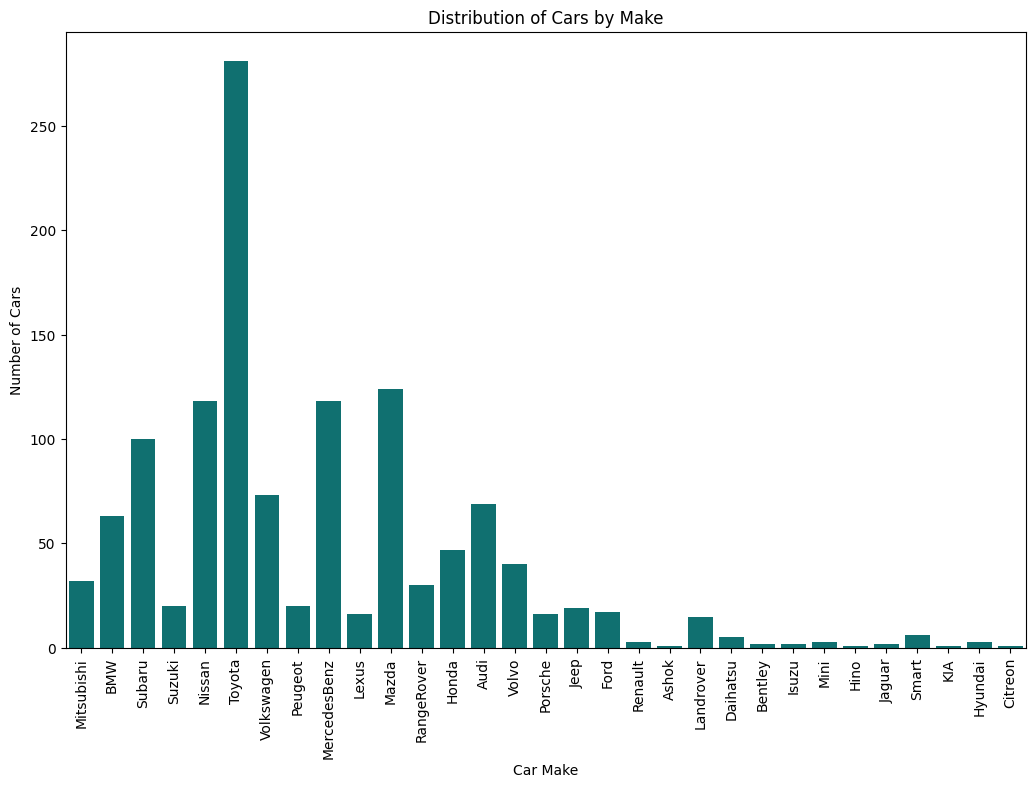

In [28]:
# show distribution by make
plt.figure(figsize=(12,8))
plt.title('Distribution of Cars by Make')
plt.xlabel('Car Make');
plt.ylabel('Number of Cars');
sns.countplot(data=car_list_df, x='Car Make', color ='teal', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [29]:
# total number of car models

car_list_df['Car Model'].nunique()

272

In [30]:
# total number of cars for each model

car_list_df['Car Model'].value_counts()

,count
Car Model,
Forester,47
Landcruiser,43
Golf,38
C200,36
CX5,35
...,...
Starlet,1
S280,1
GLS350d,1


#### We now look at various model distributions for the top 4 car makes.

In [31]:
# sort by toyota models

toyota_models = car_list_df.loc[car_list_df['Car Make'] == 'Toyota']
toyota_models.head()

,Car Make,Car Model,Transmission,Engine Rating,Year of Manufacture,Price
7,Toyota,Landcruiser,Automatic,4600 CC,2011,"KES 5,499,999"
15,Toyota,Ractis,Automatic,1500 CC,2009,"KES 549,999"
17,Toyota,Crown,Automatic,2490 CC,2011,"KES 1,079,998"
22,Toyota,Succeed,Automatic,1500 CC,2016,"KES 1,070,000"
23,Toyota,Noah,Automatic,2000 CC,2017,"KES 2,350,000"


In [32]:
# toyota models dataframe

toyota_models = pd.DataFrame(toyota_models)

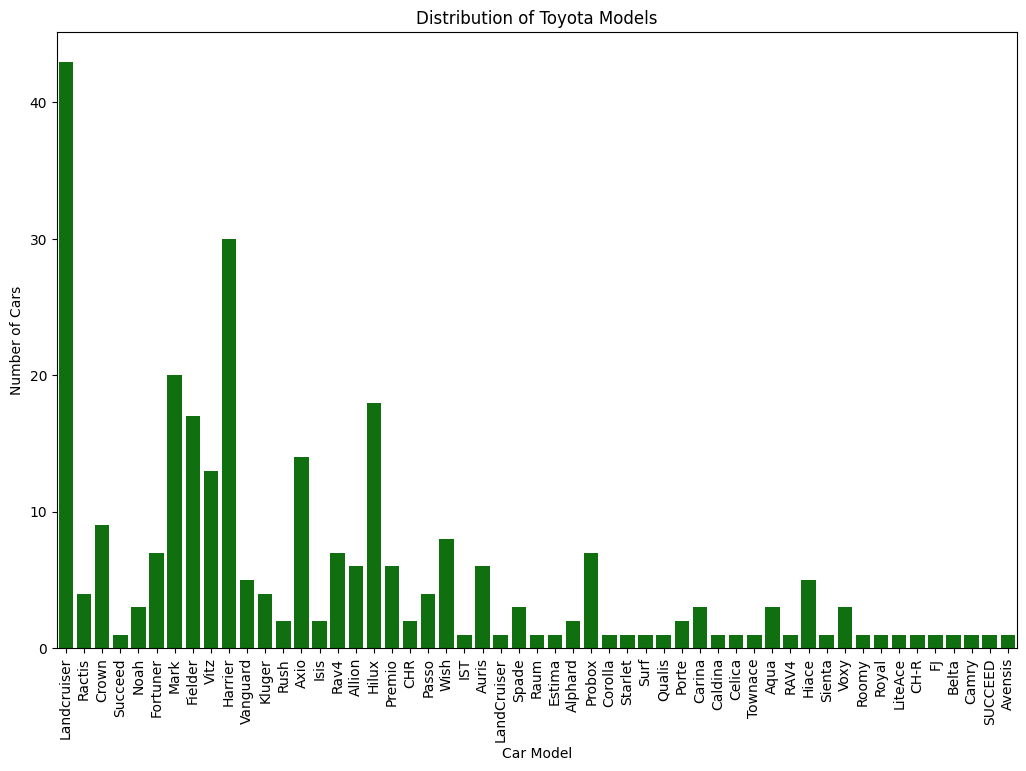

In [33]:
# distribution of toyota models

plt.figure(figsize=(12,8))
plt.title('Distribution of Toyota Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=toyota_models, x='Car Model', color ='g', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [34]:
"""
We see several duplicate models due to errors in data entry.
Let us merge these duplicates.
"""

'\nWe see several duplicate models due to errors in data entry.\nLet us merge these duplicates.\n'

In [35]:
# replace Landcruiser with LandCruiser

toyota_models["Car Model"] = toyota_models["Car Model"].replace("Landcruiser", "LandCruiser")

# replace SUCCEED with Succeed

toyota_models["Car Model"] = toyota_models["Car Model"].replace("SUCCEED", "Succeed")

# replace CHR with CH-R

toyota_models["Car Model"] = toyota_models["Car Model"].replace("CHR", "CH-R")

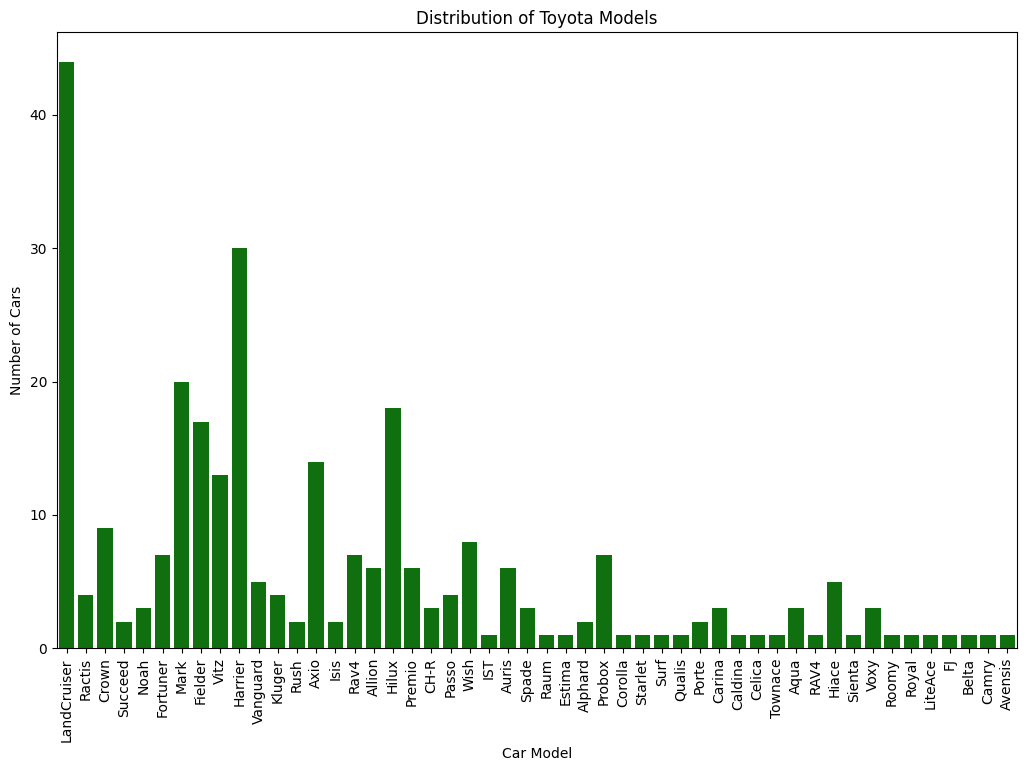

In [36]:
# distribution of toyota models

plt.figure(figsize=(12,8))
plt.title('Distribution of Toyota Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=toyota_models, x='Car Model', color ='g', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [37]:
# sort by mazda models

mazda_models = car_list_df.loc[car_list_df['Car Make'] == 'Mazda']
mazda_models.head()

,Car Make,Car Model,Transmission,Engine Rating,Year of Manufacture,Price
18,Mazda,MPV,Automatic,2490 CC,2002,"KES 329,999"
36,Mazda,Demio,Automatic,1300 CC,2015,"KES 1,350,000"
59,Mazda,Demio,Automatic,1300 CC,2013,"KES 719,999"
62,Mazda,CX5,Automatic,2000 CC,2015,"KES 2,149,999"
64,Mazda,Demio,Automatic,1300 CC,2011,"KES 589,999"


In [38]:
# mazda models dataframe

mazda_models = pd.DataFrame(mazda_models)

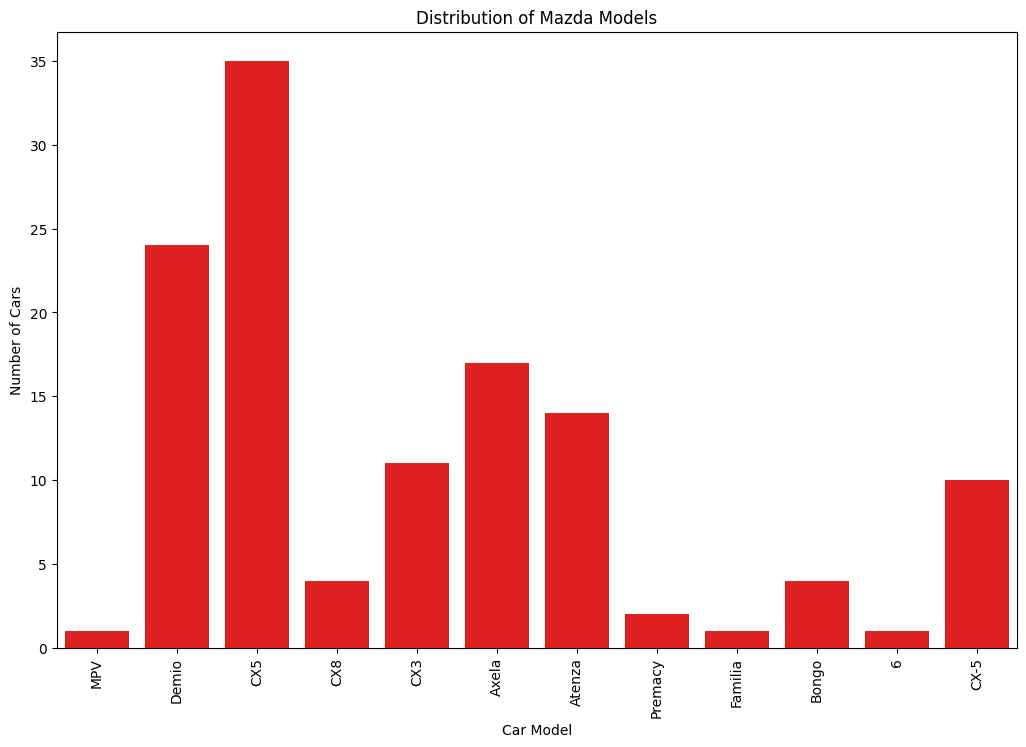

In [39]:
# distribution of mazda models

plt.figure(figsize=(12,8))
plt.title('Distribution of Mazda Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=mazda_models, x='Car Model', color ='r', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [40]:
"""
The model cx5 is duplicated as cx-5.
Let us merge the two models.
"""

'\nThe model cx5 is duplicated as cx-5. \nLet us merge the two models.\n'

In [41]:
# replace cx-5 with cx5

mazda_models["Car Model"] = mazda_models["Car Model"].replace("CX-5", "CX5")

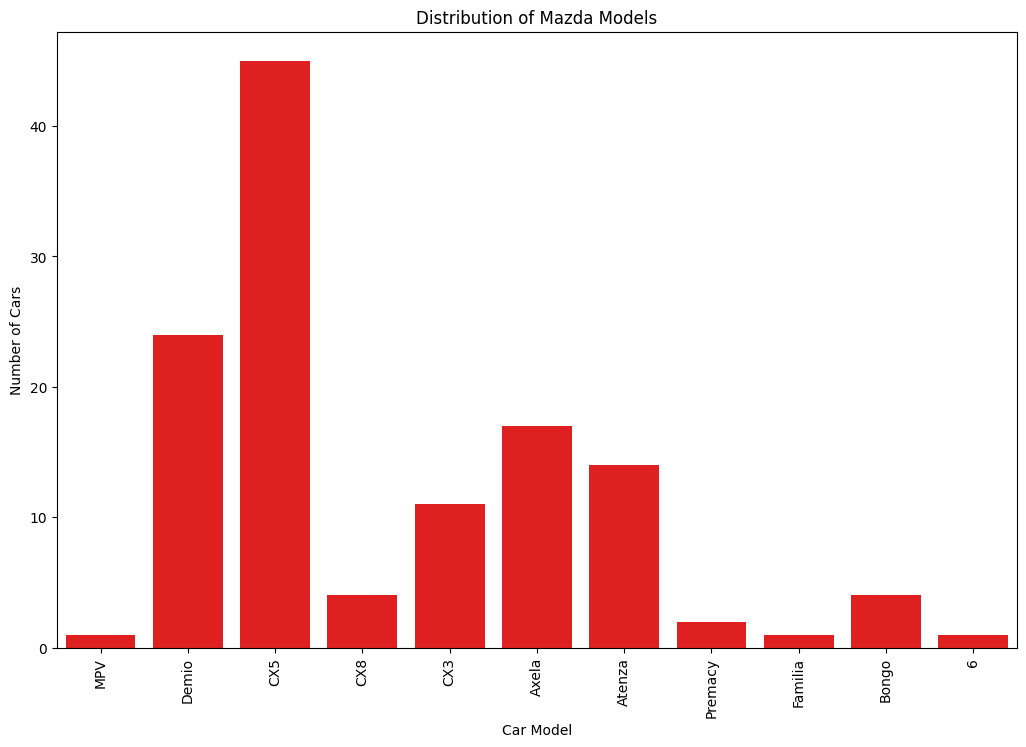

In [42]:
# distribution of mazda models

plt.figure(figsize=(12,8))
plt.title('Distribution of Mazda Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=mazda_models, x='Car Model', color ='r', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [43]:
# sort by nissan models

nissan_models = car_list_df.loc[car_list_df['Car Make'] == 'Nissan']
nissan_models.head()

,Car Make,Car Model,Transmission,Engine Rating,Year of Manufacture,Price
5,Nissan,Note,Automatic,1200 CC,2015,"KES 829,999"
6,Nissan,March,Automatic,1200 CC,2017,"KES 829,999"
19,Nissan,Skyline,Automatic,3600 CC,2011,"KES 1,849,999"
31,Nissan,Patrol,Automatic,2953 CC,2005,"KES 2,100,000"
74,Nissan,Note,Automatic,1200 CC,2017,"KES 1,249,999"


In [44]:
# nissan models dataframe

nissan_models = pd.DataFrame(nissan_models)

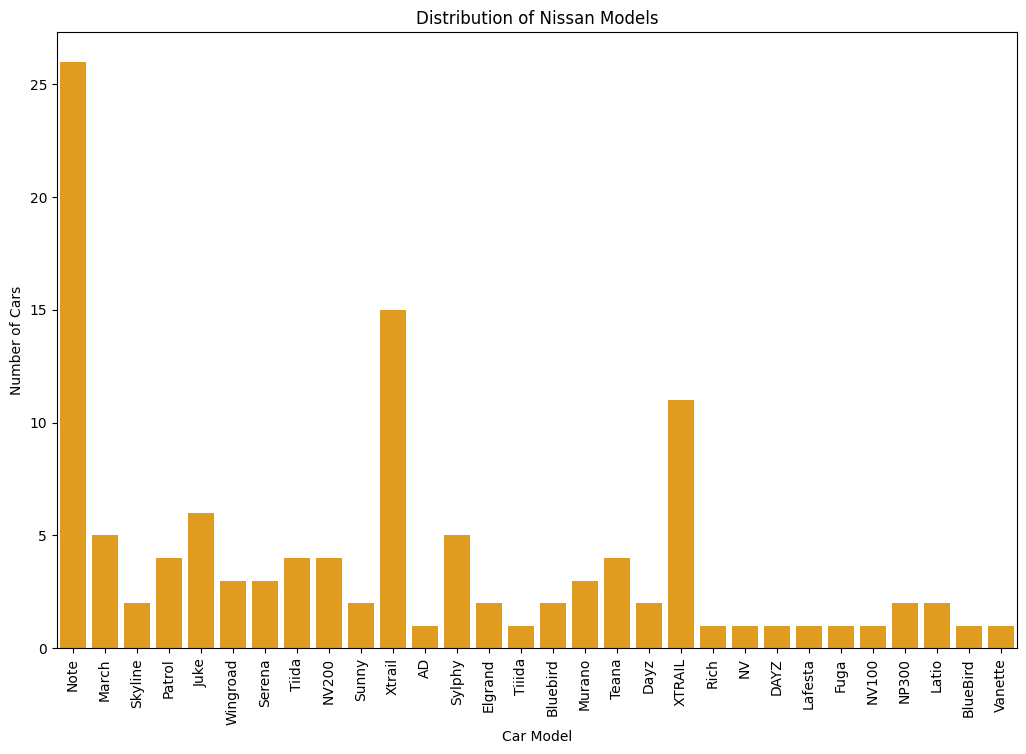

In [45]:
# distribution of nissan models

plt.figure(figsize=(12,8))
plt.title('Distribution of Nissan Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=nissan_models, x='Car Model', color ='orange', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [46]:
"""
We see several duplicate models due to errors in data entry.
Let us merge these duplicates.
"""

'\nWe see several duplicate models due to errors in data entry.\nLet us merge these duplicates.\n'

In [47]:
# replace tiiida with tiida

nissan_models["Car Model"] = nissan_models["Car Model"].replace("Tiiida", "Tiida")

# replace XTRAIL with Xtrail

nissan_models["Car Model"] = nissan_models["Car Model"].replace("XTRAIL", "Xtrail")

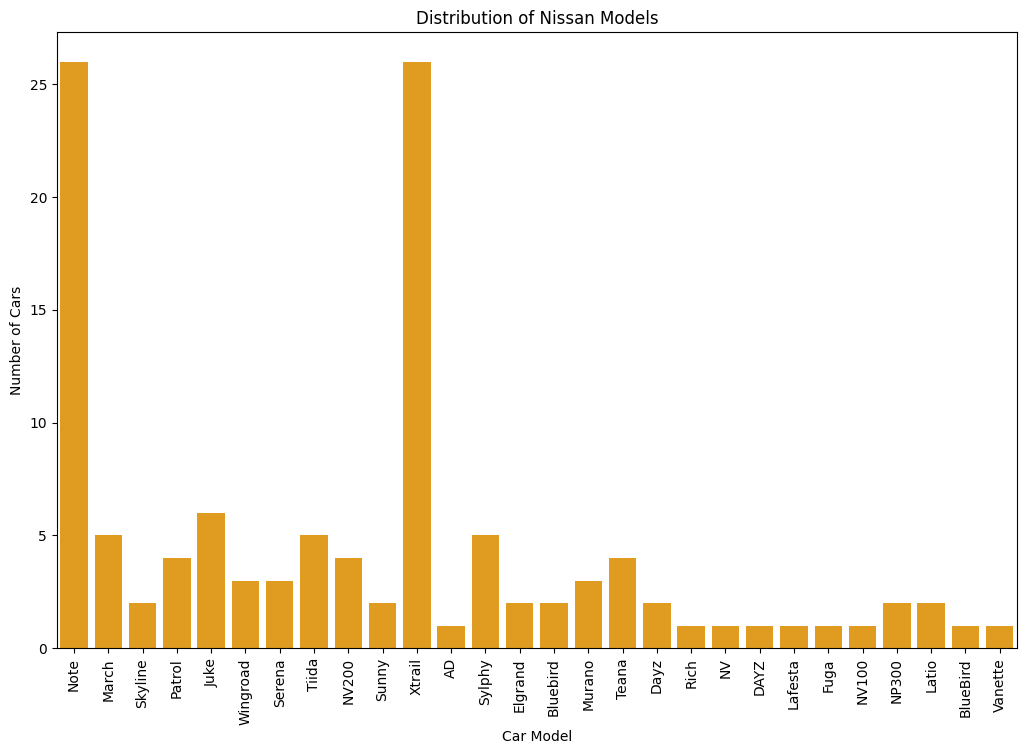

In [48]:
# distribution of nissan models

plt.figure(figsize=(12,8))
plt.title('Distribution of Nissan Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=nissan_models, x='Car Model', color ='orange', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [49]:
# sort by mercedes models

mercedes_models = car_list_df.loc[car_list_df['Car Make'] == 'MercedesBenz']
mercedes_models.head()

,Car Make,Car Model,Transmission,Engine Rating,Year of Manufacture,Price
12,MercedesBenz,E200,Automatic,2000 CC,2016,"KES 4,599,999"
13,MercedesBenz,C200,Automatic,2000 CC,2016,"KES 3,499,999"
32,MercedesBenz,ML350,Automatic,3000 CC,2013,"KES 3,800,000"
39,MercedesBenz,C220,Automatic,2143 CC,2017,"KES 3,899,000"
41,MercedesBenz,G350D,Automatic,3000 CC,2016,"KES 10,990,000"


In [50]:
# mercedes models dataframe

mercedes_models = pd.DataFrame(mercedes_models)

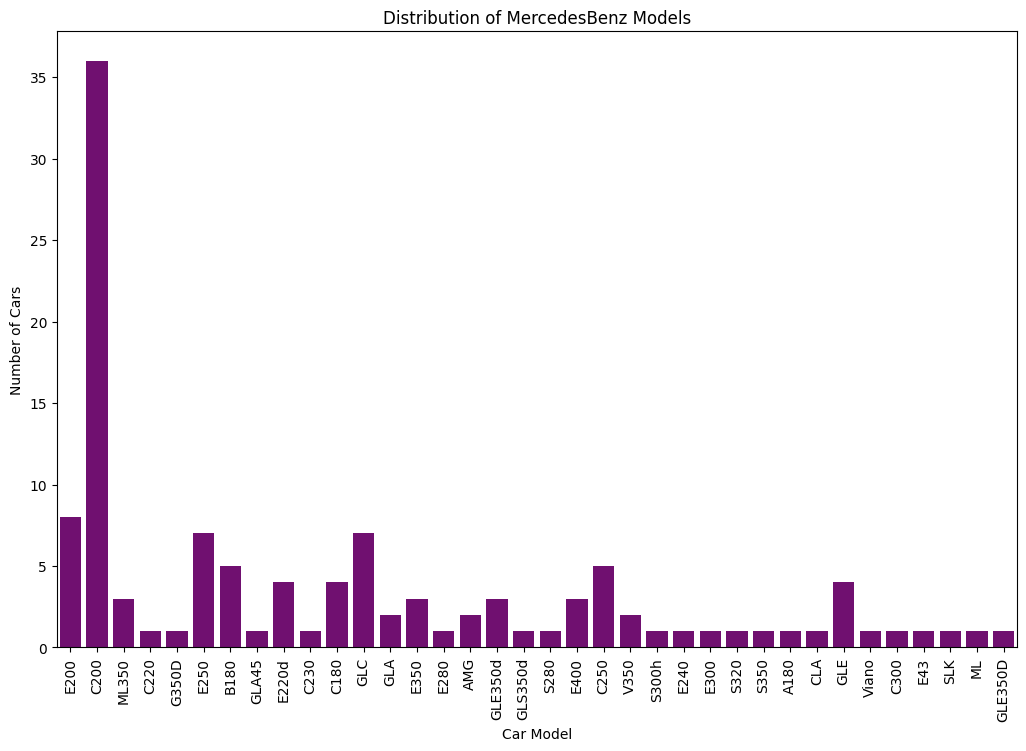

In [51]:
# distribution of mercedes models

plt.figure(figsize=(12,8))
plt.title('Distribution of MercedesBenz Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=mercedes_models, x='Car Model', color ='purple', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()

In [52]:
# print rows with GLE model

print(mercedes_models.loc[mercedes_models['Car Model'] == 'GLE'])

          Car Make Car Model Transmission Engine Rating  Year of Manufacture  \
769   MercedesBenz       GLE    Automatic       3000 CC                 2017   
793   MercedesBenz       GLE    Automatic       3000 CC                 2017   
819   MercedesBenz       GLE    Automatic       3000 CC                 2015   
1077  MercedesBenz       GLE    Automatic       3000 CC                 2016   

               Price  
769   KES 11,499,999  
793    KES 9,499,999  
819    KES 5,799,999  
1077   KES 9,499,999  


In [53]:
# print rows with ML model

print(mercedes_models.loc[mercedes_models['Car Model'] == 'ML'])

         Car Make Car Model Transmission Engine Rating  Year of Manufacture  \
951  MercedesBenz        ML    Automatic       3200 CC                 2002   

           Price  
951  KES 899,999  


In [54]:
# print rows with AMG model

print(mercedes_models.loc[mercedes_models['Car Model'] == 'AMG'])

         Car Make Car Model Transmission Engine Rating  Year of Manufacture  \
386  MercedesBenz       AMG    Automatic       4000 CC                 2017   
580  MercedesBenz       AMG    Automatic       3000 CC                 2017   

             Price  
386  KES 9,799,999  
580  KES 9,499,999  


In [55]:
"""
According to mercedes benz nomenclature GLE and ML would normally be followed by numbers
to further specify the model of the car. In our case the numbers are missing.
Also, AMG is a performance trim of mercedes benz cars and is not an independent model.
We are unable to match these incomplete model names to any fully named model.
So, we keep these model names as separate mercedes models.
However, we can merge the other fully named models that have been duplicated
due to errors in data entry.

"""

'\nAccording to mercedes benz nomenclature GLE and ML would normally be followed by numbers \nto further specify the model of the car. In our case the numbers are missing.\nAlso, AMG is a performance trim of mercedes benz cars and is not an independent model.\nWe are unable to match these incomplete model names to any fully named model.\nSo, we keep these model names as separate mercedes models.\nHowever, we can merge the other fully named models that have been duplicated \ndue to errors in data entry.\n\n'

In [56]:
# replace GLE350d, G350D with GLE350D

mercedes_models["Car Model"] = mercedes_models["Car Model"].replace("GLE350d", "GLE350D")
mercedes_models["Car Model"] = mercedes_models["Car Model"].replace("G350D", "GLE350D")

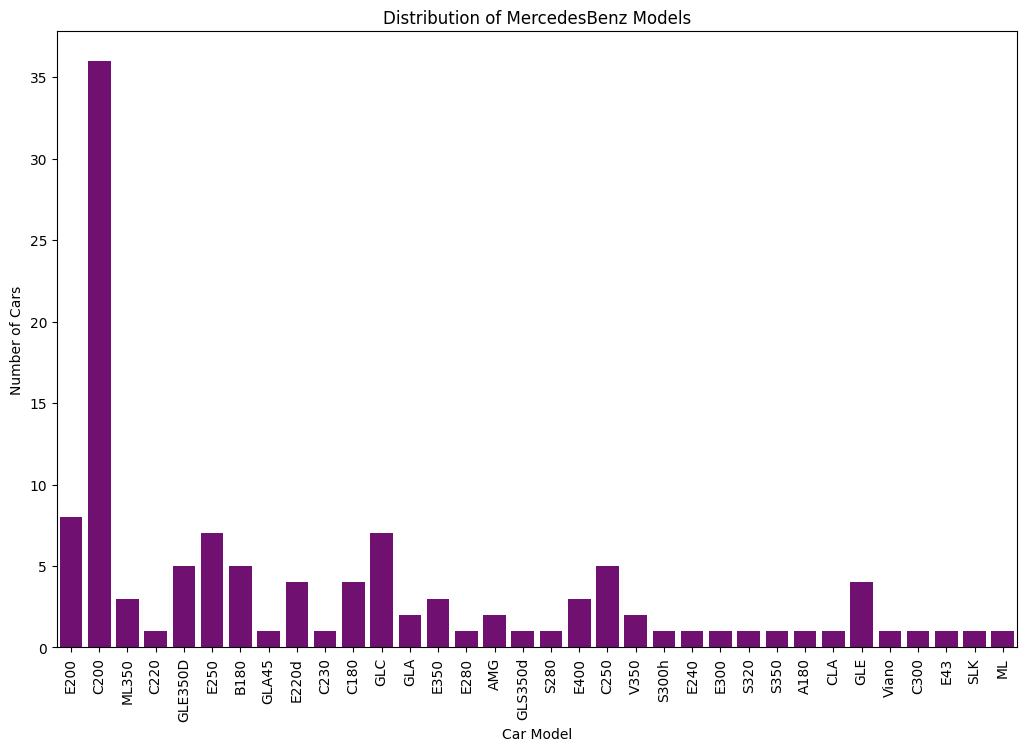

In [57]:
# distribution of mercedes models

plt.figure(figsize=(12,8))
plt.title('Distribution of MercedesBenz Models')
plt.xlabel('Car Model');
plt.ylabel('Number of Cars');
sns.countplot(data=mercedes_models, x='Car Model', color ='purple', width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9)
plt.show()